In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ---------------------------------------- 0.0/939.5 kB ? eta -:--:--
     - ----------------------------------- 30.7/939.5 kB 660.6 kB/s eta 0:00:02
     --- ----------------------------------- 92.2/939.5 kB 1.3 MB/s eta 0:00:01
     ------------ ------------------------- 307.2/939.5 kB 2.7 MB/s eta 0:00:01
     ------------------------------ ------- 747.5/939.5 kB 4.7 MB/s eta 0:00:01
     --------------------------------- ---- 839.7/939.5 kB 4.1 MB/s eta 0:00:01
     -------------------------------------- 939.5/939.5 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/101.1 kB ? eta -:--:--
   ---------------------------------------- 10

In [109]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [110]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [111]:
Tesla = yf.Ticker("TSLA")

In [112]:
tesla_data = Tesla.history(period="max")

In [113]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [114]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

In [115]:
soup = BeautifulSoup(html_data, "html.parser")

In [116]:
tesla_table = soup.find_all("tbody")[1]
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tesla_table.find_all("tr")[1:]:
    cells = row.find_all("td")
    date = cells[0].text.strip()
    revenue = cells[1].text.strip()
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

print(tesla_revenue)

          Date  Revenue
0   2022-06-30  $16,934
1   2022-03-31  $18,756
2   2021-12-31  $17,719
3   2021-09-30  $13,757
4   2021-06-30  $11,958
5   2021-03-31  $10,389
6   2020-12-31  $10,744
7   2020-09-30   $8,771
8   2020-06-30   $6,036
9   2020-03-31   $5,985
10  2019-12-31   $7,384
11  2019-09-30   $6,303
12  2019-06-30   $6,350
13  2019-03-31   $4,541
14  2018-12-31   $7,226
15  2018-09-30   $6,824
16  2018-06-30   $4,002
17  2018-03-31   $3,409
18  2017-12-31   $3,288
19  2017-09-30   $2,985
20  2017-06-30   $2,790
21  2017-03-31   $2,696
22  2016-12-31   $2,285
23  2016-09-30   $2,298
24  2016-06-30   $1,270
25  2016-03-31   $1,147
26  2015-12-31   $1,214
27  2015-09-30     $937
28  2015-06-30     $955
29  2015-03-31     $940
30  2014-12-31     $957
31  2014-09-30     $852
32  2014-06-30     $769
33  2014-03-31     $621
34  2013-12-31     $615
35  2013-09-30     $431
36  2013-06-30     $405
37  2013-03-31     $562
38  2012-12-31     $306
39  2012-09-30      $50
40  2012-06-30  

In [117]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$',"")

In [118]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [119]:
print(tesla_revenue.tail(5))

          Date Revenue
47  2010-09-30      31
48  2010-06-30      28
49  2010-03-31      21
51  2009-09-30      46
52  2009-06-30      27


In [120]:
GameStop = yf.Ticker("GME")

In [121]:
gme_data = GameStop.history(period="max")

In [122]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [123]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data2 = response2.text

In [124]:
soup2 = BeautifulSoup(html_data2, "html.parser")

In [125]:
gme_table = soup2.find_all("tbody")[1]
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in gme_table.find_all("tr")[1:]:
    cells = row.find_all("td")
    date = cells[0].text.strip()
    revenue = cells[1].text.strip().replace("$", "")  # Remove dollar sign
    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)
print(gme_revenue)

          Date Revenue
0   2020-01-31   2,194
1   2019-10-31   1,439
2   2019-07-31   1,286
3   2019-04-30   1,548
4   2019-01-31   3,063
..         ...     ...
56  2006-01-31   1,667
57  2005-10-31     534
58  2005-07-31     416
59  2005-04-30     475
60  2005-01-31     709

[61 rows x 2 columns]


In [134]:
print(gme_revenue.tail(5))

         Date Revenue
56 2006-01-31   1,667
57 2005-10-31     534
58 2005-07-31     416
59 2005-04-30     475
60 2005-01-31     709


In [127]:
import matplotlib.pyplot as plt
import pandas as pd

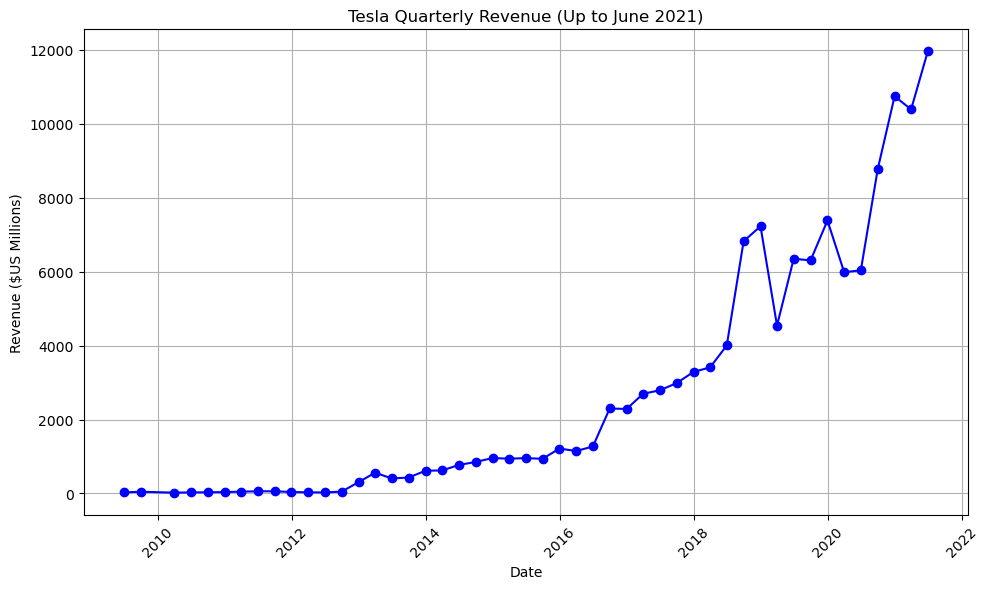

In [139]:
def make_graph(dataframe, end_date="2021-06-30"):
   
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe['Revenue'] = dataframe['Revenue'].astype(float)
    
    dataframe = dataframe.sort_values(by='Date')
    
    dataframe = dataframe[dataframe['Date'] <= end_date]
   
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe['Date'], dataframe['Revenue'], marker='o', linestyle='-', color='b')
  
    plt.title("Tesla Quarterly Revenue (Up to June 2021)")
    plt.xlabel("Date")
    plt.ylabel("Revenue ($US Millions)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    plt.show()

make_graph(tesla_revenue)

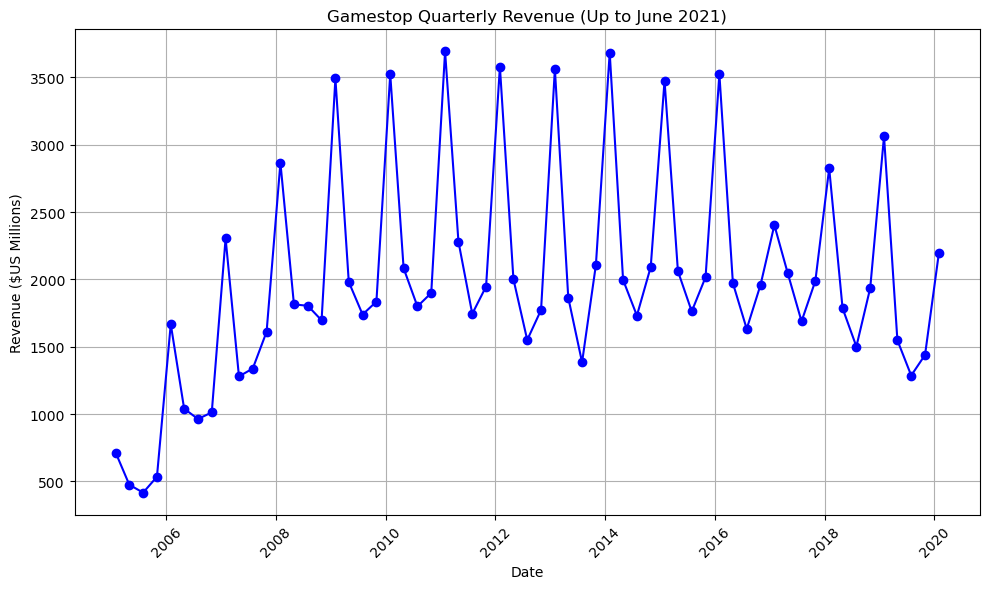

In [146]:
def make_graph(dataframe, end_date="2021-06-30"):
    
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe['Revenue'] = dataframe['Revenue'].astype(float)
    
    dataframe = dataframe.sort_values(by='Date')
    
    dataframe = dataframe[dataframe['Date'] <= end_date]
   
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe['Date'], dataframe['Revenue'], marker='o', linestyle='-', color='b')
   
    plt.title("Gamestop Quarterly Revenue (Up to June 2021)")
    plt.xlabel("Date")
    plt.ylabel("Revenue ($US Millions)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    plt.show()

make_graph(gme_revenue)